# Quandl 2: Analysis

This notebook describes the following:
1. Getting data from quandl,
2. Applying some descriptive analytics,
3. Applying time series analysis,
4. Running a linear regression,
5. Code: VAR,
6. Code: Fixed effects,
7. OLS with Pandas,
8. Logistic regression.

*Note: the notebook itself aims to introduce the "analysis" interface without concetrating on details of rigorous economic research.*

Resources:
- [Pandas computational functions](http://pandas.pydata.org/pandas-docs/version/0.9.0/computation.html)

### 1. Getting data from quandl

In [1]:
import quandl

In [3]:
with open('quandl_key.txt','r') as f:
    key = f.read()

In [147]:
data = quandl.get(["FRED/GDP","FRED/UNRATE", "FRED/FEDFUNDS", "FRED/CPIAUCSL"],authtoken=key, collapse="annual")

In [148]:
data.head()

,FRED/GDP - Value,FRED/UNRATE - Value,FRED/FEDFUNDS - Value,FRED/CPIAUCSL - Value
Date,,,,
1947-12-31,260.3,NaN,NaN,23.41
1948-12-31,280.7,4.0,NaN,24.05
1949-12-31,271.0,6.6,NaN,23.61
1950-12-31,320.3,4.3,NaN,24.98
1951-12-31,356.6,3.1,NaN,26.47


In [7]:
data[[0]].head()

,FRED/GDP - Value
Date,
1947-12-31,260.3
1948-12-31,280.7
1949-12-31,271.0
1950-12-31,320.3
1951-12-31,356.6


### 2. Applying some descriptive analytics

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 71 entries, 1947-12-31 to 2017-12-31
Data columns (total 4 columns):
FRED/GDP - Value         71 non-null float64
FRED/UNRATE - Value      70 non-null float64
FRED/FEDFUNDS - Value    64 non-null float64
FRED/CPIAUCSL - Value    71 non-null float64
dtypes: float64(4)
memory usage: 2.8 KB


In [61]:
data.describe()

,FRED/GDP - Value,FRED/UNRATE - Value,FRED/FEDFUNDS - Value,FRED/CPIAUCSL - Value
count,71.000000,70.000000,64.000000,71.000000
mean,5874.000000,5.794286,4.817969,107.397915
std,5932.320223,1.620510,3.672046,75.778956
min,260.300000,2.700000,0.070000,23.410000
25%,735.750000,4.700000,2.287500,31.550000
50%,3407.800000,5.550000,4.470000,97.700000
75%,10199.200000,6.600000,6.612500,171.700000
max,19027.100000,10.800000,18.900000,243.846000


In [9]:
data.corr()

,FRED/GDP - Value,FRED/UNRATE - Value,FRED/FEDFUNDS - Value,FRED/CPIAUCSL - Value
FRED/GDP - Value,1.000000,0.179185,-0.476201,0.981338
FRED/UNRATE - Value,0.179185,1.000000,0.055904,0.252364
FRED/FEDFUNDS - Value,-0.476201,0.055904,1.000000,-0.377063
FRED/CPIAUCSL - Value,0.981338,0.252364,-0.377063,1.000000


In [10]:
data.cov()

,FRED/GDP - Value,FRED/UNRATE - Value,FRED/FEDFUNDS - Value,FRED/CPIAUCSL - Value
FRED/GDP - Value,3.519242e+07,1723.718381,-10389.773552,441155.722619
FRED/UNRATE - Value,1.723718e+03,2.626054,0.322154,30.935200
FRED/FEDFUNDS - Value,-1.038977e+04,0.322154,13.483921,-103.118090
FRED/CPIAUCSL - Value,4.411557e+05,30.935200,-103.118090,5742.450208


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

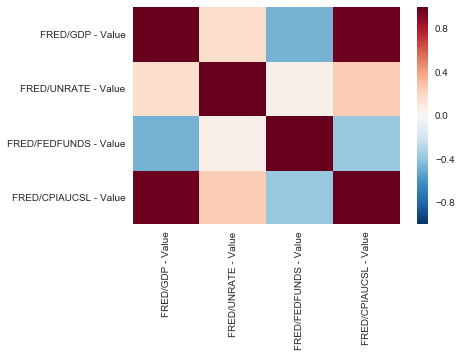

In [13]:
sns.heatmap(data.corr())

### 3. Applying time series analysis

In [70]:
from statsmodels.tsa.arima_model import ARIMA

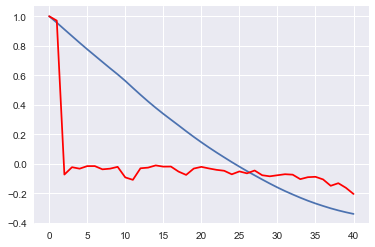

In [77]:
from statsmodels.tsa.stattools import acf, pacf #ACF and PACF, which are later explained
acf = acf(data[[0]])
pacf = pacf(data[[0]])
plt.plot(acf) # q: number of MA components
plt.plot(pacf,'r') # p: number of AR components

In [88]:
from statsmodels.tsa.stattools import adfuller

In [96]:
stationarity_test = adfuller(data["FRED/GDP - Value"])
print(stationarity_test[1])

0.712949320292


In [82]:
model = ARIMA(data[[0]], order=(1, 1, 0)) #AR(p), I(d), MA(q)

In [83]:
results = model.fit()

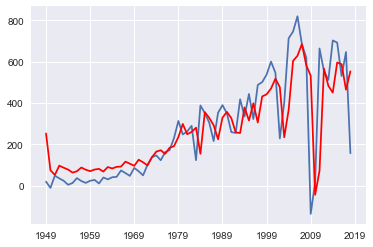

In [84]:
plt.plot(data[[0]].diff()) # plot the original data graph
plt.plot(results.fittedvalues, 'r') # plot the fitted graph 

In [35]:
from statsmodels.tsa.arima_model import ARIMAResults

In [85]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D.FRED/GDP - Value   No. Observations:                   70
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -452.316
Method:                       css-mle   S.D. of innovations            153.929
Date:                Mon, 03 Jul 2017   AIC                            910.631
Time:                        20:37:03   BIC                            917.377
Sample:                    12-31-1948   HQIC                           913.311
                         - 12-31-2017                                         
============================================================================================
                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
const                      253.0893     74.370      3.403      0.001       107.327   398.852
ar.L1.D.FRED/GDP - Value     0.7625      0.076     10.099      0.000         0.615     0.911
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3114           +0.0000j            1.3114            0.0000
-----------------------------------------------------------------------------
"""

### 4. Running a linear regressions

In [57]:
from statsmodels.formula.api import ols

In [54]:
model_ols = ols(formula="data[[0]] ~ data[[1]]+data[[2]]+data[[3]]", data=data)

In [55]:
results_ols = model_ols.fit()

In [56]:
results_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              data[[0]]   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     865.8
Date:                Mon, 03 Jul 2017   Prob (F-statistic):           2.52e-49
Time:                        20:11:55   Log-Likelihood:                -525.15
No. Observations:                  64   AIC:                             1058.
Df Residuals:                      60   BIC:                             1067.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -177.1130    498.665     -0.355      0.724     -1174.591   820.365
data[[1]]   -204.7884     75.228     -2.722      0.008      -355.266   -54.310
data[[2]]   -188.5093     34.191     -5.513      0.000      -256.902  -120.117
data[[3]]     75.4664      1.709     44.162      0.000        72.048    78.885
==============================================================================
Omnibus:                        0.983   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.612   Jarque-Bera (JB):                1.060
Skew:                          -0.227   Prob(JB):                        0.589
Kurtosis:                       2.563   Cond. No.                         606.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010A3E7F0>]], dtype=object)

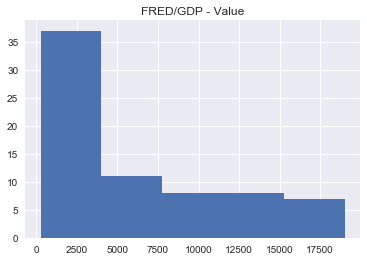

In [67]:
data[[0]].hist(bins=5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010EA05C0>]], dtype=object)

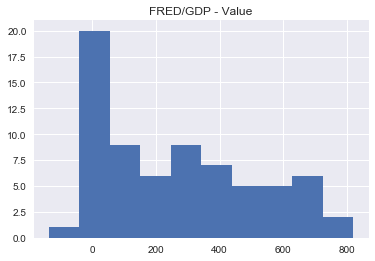

In [68]:
data[[0]].diff().hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000110100F0>]], dtype=object)

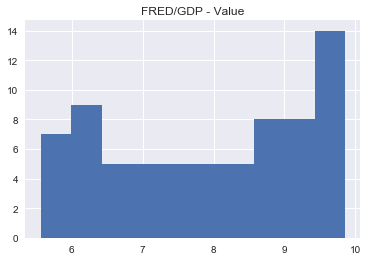

In [69]:
import numpy as np
np.log(data[[0]]).hist()

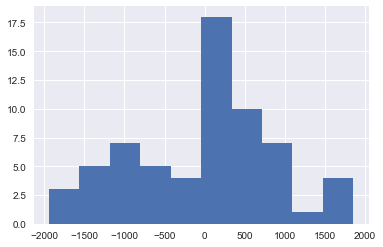

In [98]:
results_ols.resid.hist()

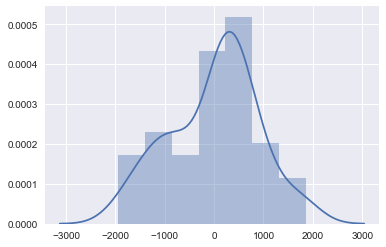

In [99]:
sns.distplot(results_ols.resid)

### 5. VAR

In [ ]:
from statsmodels.tsa.api import VAR
model_var = VAR(mdata[[0]])
results_var = model_var.fit()
results_var.summary()

### 6. Panel data

In [ ]:
from pandas.stats.plm import PanelOLS
reg  = PanelOLS(y=data[[0]],x=data[[1]],time_effects=True)
reg

### 7. OLS with Pandas

In [127]:
from pandas.stats.ols import OLS
linear  = OLS(y=data["FRED/GDP - Value"],x=data["FRED/UNRATE - Value"])
linear


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         70
Number of Degrees of Freedom:   2

R-squared:         0.0321
Adj R-squared:     0.0179

Rmse:           5882.9726

F-stat (1, 68):     2.2557, p-value:     0.1378

Degrees of Freedom: model 1, resid 68

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x   656.3911   437.0393       1.50     0.1378  -200.2059  1512.9881
     intercept  2150.8781  2628.1394       0.82     0.4160 -3000.2752  7302.0314
---------------------------------End of Summary---------------------------------

### 8. Logistic regression

In [131]:
data[[0]].pct_change().mean()

FRED/GDP - Value    0.063803
dtype: float64

In [132]:
import numpy as np

In [149]:
data["GDP_status"] = np.where(data[[0]].pct_change()>data[[0]].pct_change().mean(),1,0)

In [150]:
data.head()

,FRED/GDP - Value,FRED/UNRATE - Value,FRED/FEDFUNDS - Value,FRED/CPIAUCSL - Value,GDP_status
Date,,,,,
1947-12-31,260.3,NaN,NaN,23.41,0
1948-12-31,280.7,4.0,NaN,24.05,1
1949-12-31,271.0,6.6,NaN,23.61,0
1950-12-31,320.3,4.3,NaN,24.98,1
1951-12-31,356.6,3.1,NaN,26.47,1


In [161]:
data["FRED/UNRATE - Value"]= data["FRED/UNRATE - Value"].fillna(data["FRED/UNRATE - Value"].mean())

In [162]:
from statsmodels.api import Logit
logit = Logit(data['GDP_status'], data["FRED/CPIAUCSL - Value"])
results_logit = logit.fit()
results_logit.summary()

Optimization terminated successfully.
         Current function value: 0.646569
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             GDP_status   No. Observations:                   71
Model:                          Logit   Df Residuals:                       70
Method:                           MLE   Df Model:                            0
Date:                Mon, 03 Jul 2017   Pseudo R-squ.:                 0.06385
Time:                        22:24:52   Log-Likelihood:                -45.906
converged:                       True   LL-Null:                       -49.037
                                        LLR p-value:                       nan
=========================================================================================
                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
FRED/CPIAUCSL - Value    -0.0049      0.002     -2.438      0.015        -0.009    -0.001
=========================================================================================
"""